In [1]:
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5874613/

In [46]:
passes

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,playmaker,lead_to_ball_lost,Possession_Outcome,nbr_nerby_ply,closest_opponent,Type_of_Pass,nbr_crossed_ply,x1_bin,y1_bin,x2_bin,y2_bin,xThreat_Pass
28,Home,PASS,Normal,1,1467,58.68,1489,59.56,Player1,Player11,46.64,21.08,53.00,10.20,False,False,0,"[0, 0]","[24.146668273772256, 28.89895448423697]",defensive,0,0,1,0,2,0.001379
36,Home,PASS,HEAD,1,1672,66.88,1693,67.72,Player6,Player7,19.08,14.96,19.08,8.84,False,True,0,"[2, 1]","[5.158233928662023, 4.753802913205381]",defensive,7,3,2,3,2,0.000000
52,Home,PASS,Normal,1,2414,96.56,2440,97.60,Player3,Player8,16.96,-24.48,1.06,-29.92,False,False,0,"[2, 0]","[15.240369010230694, 3.874641588173034]",neutral,3,4,6,6,7,0.002589
53,Home,PASS,Normal,1,2465,98.60,2493,99.72,Player8,Player4,2.12,-29.92,10.60,-31.96,False,False,0,"[1, 2]","[2.698206456148232, 4.275410147716814]",defensive,3,5,7,4,7,-0.001221
54,Home,PASS,Normal,1,2511,100.44,2546,101.84,Player4,Player3,11.66,-31.96,27.56,-25.16,False,False,0,"[0, 1]","[2.5343732328131976, 14.49361906462289]",defensive,2,4,7,2,6,-0.001839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,Home,PASS,Normal,2,120975,4839.00,120998,4839.92,Player13,Player12,13.78,2.04,26.50,-3.40,True,False,0.5,"[2, 0]","[12.279527152215593, 2.623327610497783]",progressive,0,7,4,9,3,0.015143
1752,Home,PASS,Normal,2,124106,4964.24,124177,4967.08,Player5,Player10,-10.60,17.68,18.02,27.20,False,False,0,"[3, 1]","[7.1683084019871774, 6.57627711070633]",progressive,0,4,5,8,7,0.008530
1753,Home,PASS,Normal,2,124311,4972.44,124336,4973.44,Player10,Player9,54.06,14.28,45.58,-0.00,False,False,0,"[4, 1]","[2.5325097336041993, 1.3883696337791338]",progressive,3,11,5,11,4,0.193028
1845,Home,PASS,GOAL KICK,2,133363,5334.52,133417,5336.68,Player11,Player7,-46.64,-5.44,5.30,-27.20,False,False,0.5,"[2, 0]","[21.940039005106623, 2.49302407120349]",progressive,3,0,3,6,0,0.005325


In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)

import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns 

In [3]:
import Metrica_IO as mio
import Metrica_Viz as mviz

In [4]:
DATADIR = "C:\\Users\\Michael\Documents\\MACF courses material\\Fall 2022\\STAT 497\\Project1-master\\sample-data-master\\sample-data-master\\data"
game_id = 2 # let's look at sample match 2
# set up initial path to data
events = mio.read_event_data(r"C:\Users\Michael\Documents\MACF courses material\Fall 2022\STAT 497\Project1-master\sample-data-master\sample-data-master\data", game_id)


In [5]:
#Data cleaning
# Bit of housekeeping: unit conversion from metric data units to meters
events = mio.to_metric_coordinates(events)
events.head()


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68
2,Away,PASS,NaN,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04
3,Away,PASS,NaN,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96
4,Away,PASS,NaN,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44


In [6]:
passes = events.loc[events["Type"]=="PASS"]
passes["Subtype"] = passes["Subtype"].fillna("Normal")

passes["Subtype"].unique()

#passes = passes.reset_index()
#array([nan, 'HEAD', 'CROSS', 'DEEP BALL', 'GOAL KICK',
#      'HEAD-INTERCEPTION-CLEARANCE'], dtype=object)

C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\2483670518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes["Subtype"] = passes["Subtype"].fillna("Normal")


array(['Normal', 'HEAD', 'CROSS', 'DEEP BALL', 'GOAL KICK',
       'HEAD-INTERCEPTION-CLEARANCE'], dtype=object)

In [7]:
events[events['Subtype']=='OFFSIDE']

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
476,Home,BALL LOST,OFFSIDE,1,29845,1193.8,29845,1193.8,Player10,NaN,-53.0,-12.92,NaN,NaN


In [49]:
passes

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,playmaker,lead_to_ball_lost,Possession_Outcome,nbr_nerby_ply,closest_opponent,Type_of_Pass,nbr_crossed_ply,x1_bin,y1_bin,x2_bin,y2_bin,xThreat_Pass
28,Home,PASS,Normal,1,1467,58.68,1489,59.56,Player1,Player11,46.64,21.08,53.00,10.20,False,False,0,"[0, 0]","[24.146668273772256, 28.89895448423697]",defensive,0,0,1,0,2,0.001379
36,Home,PASS,HEAD,1,1672,66.88,1693,67.72,Player6,Player7,19.08,14.96,19.08,8.84,False,True,0,"[2, 1]","[5.158233928662023, 4.753802913205381]",defensive,7,3,2,3,2,0.000000
52,Home,PASS,Normal,1,2414,96.56,2440,97.60,Player3,Player8,16.96,-24.48,1.06,-29.92,False,False,0,"[2, 0]","[15.240369010230694, 3.874641588173034]",neutral,3,4,6,6,7,0.002589
53,Home,PASS,Normal,1,2465,98.60,2493,99.72,Player8,Player4,2.12,-29.92,10.60,-31.96,False,False,0,"[1, 2]","[2.698206456148232, 4.275410147716814]",defensive,3,5,7,4,7,-0.001221
54,Home,PASS,Normal,1,2511,100.44,2546,101.84,Player4,Player3,11.66,-31.96,27.56,-25.16,False,False,0,"[0, 1]","[2.5343732328131976, 14.49361906462289]",defensive,2,4,7,2,6,-0.001839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,Home,PASS,Normal,2,120975,4839.00,120998,4839.92,Player13,Player12,13.78,2.04,26.50,-3.40,True,False,0.5,"[2, 0]","[12.279527152215593, 2.623327610497783]",progressive,0,7,4,9,3,0.015143
1752,Home,PASS,Normal,2,124106,4964.24,124177,4967.08,Player5,Player10,-10.60,17.68,18.02,27.20,False,False,0,"[3, 1]","[7.1683084019871774, 6.57627711070633]",progressive,0,4,5,8,7,0.008530
1753,Home,PASS,Normal,2,124311,4972.44,124336,4973.44,Player10,Player9,54.06,14.28,45.58,-0.00,False,False,0,"[4, 1]","[2.5325097336041993, 1.3883696337791338]",progressive,3,11,5,11,4,0.193028
1845,Home,PASS,GOAL KICK,2,133363,5334.52,133417,5336.68,Player11,Player7,-46.64,-5.44,5.30,-27.20,False,False,0.5,"[2, 0]","[21.940039005106623, 2.49302407120349]",progressive,3,0,3,6,0,0.005325


In [59]:
passes[passes['playmaker']==True].count()

Team                  27
Type                  27
Subtype               27
Period                27
Start Frame           27
Start Time [s]        27
End Frame             27
End Time [s]          27
From                  27
To                    27
Start X               27
Start Y               27
End X                 27
End Y                 27
playmaker             27
lead_to_ball_lost     27
Possession_Outcome    27
nbr_nerby_ply         27
closest_opponent      27
Type_of_Pass          27
nbr_crossed_ply       27
x1_bin                27
y1_bin                27
x2_bin                27
y2_bin                27
xThreat_Pass          27
dtype: int64

### Factor #3. Possession of the ball: quantify by its outcome

##### 3.	Possession is quantify by it’s outcome:
The series of passes that lead to a:
   - Goal/Shot  will have 1 point
   - Corner, free kick, throw-in ( and still in position of the ball)  will have 0.5 point
   - Lost possession will have 0 point
   
Visual Analysis of Pressure in Footbal: https://openaccess.city.ac.uk/id/eprint/17464/1/VAofPressing.pdf

In [9]:
# 
index = events[(events["Type"]=='SHOT')].index
shift_index = np.array(index)-1
app = np.append(shift_index, shift_index-1)
idx = events.iloc[app].sort_index()[events['Type']=='PASS'].index
passes['playmaker'] = passes.index.isin(idx)



index = events[(events["Type"]=='BALL LOST')].index
shift_index = np.array(index)-1
idx = events.iloc[shift_index].sort_index()[events['Type']=='PASS'].index
passes['lead_to_ball_lost'] = passes.index.isin(idx)

#passes['Playmaker'] = passes.iloc[index]

C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\3111362360.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx = events.iloc[app].sort_index()[events['Type']=='PASS'].index
C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\3111362360.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['playmaker'] = passes.index.isin(idx)
C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\3111362360.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx = events.iloc[shift_index].sort_index()[events['Type']=='PASS'].index
C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\3111362360.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [10]:
index = events[(events["Type"]=='SHOT')].index
passes['Possession_Outcome'] = ''
for i in np.array(index):
 
    while i > 1:
        i= i-1
        
        if events.iloc[i]['Type'] == 'PASS':
            passes.at[i, 'Possession_Outcome'] = 1
           
            
        else:
            break

index = events[(events["Type"]=='SET PIECE')].index

for i in np.array(index):
    j=i
    
    ind = True
    while j > 1:
        j= j-1
        
                
        if (events.iloc[j]['Type'] == 'PASS'):
                passes.at[j, 'Possession_Outcome'] = 0.5
                ind = False
                
        elif ((events.iloc[j]['Type'] != 'PASS') & (ind ==True)):
            if  (((events.iloc[i-1]['End Time [s]']-25) > events.iloc[j]['Start Time [s]'])):
                break
        else:
            break
            
passes['Possession_Outcome'] =np.where(passes['Possession_Outcome'] == '',0, passes['Possession_Outcome'] )               
        

C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\4039686183.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['Possession_Outcome'] = ''
C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\4039686183.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['Possession_Outcome'] =np.where(passes['Possession_Outcome'] == '',0, passes['Possession_Outcome'] )


In [54]:
events[(events["Type"]=='GOAL')].index


Int64Index([], dtype='int64')

In [12]:
events[events['Type']== 'SET PIECE'].head()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,51,2.04,51,2.04,Player23,NaN,NaN,NaN,NaN,NaN
11,Away,SET PIECE,THROW IN,1,672,26.88,672,26.88,Player15,NaN,NaN,NaN,NaN,NaN
111,Home,SET PIECE,THROW IN,1,6354,254.16,6354,254.16,Player1,NaN,NaN,NaN,NaN,NaN
129,Home,SET PIECE,FREE KICK,1,8148,325.92,8148,325.92,Player6,NaN,NaN,NaN,NaN,NaN
140,Home,SET PIECE,THROW IN,1,8720,348.80,8720,348.80,Player4,NaN,NaN,NaN,NaN,NaN


In [13]:
# Get events by team
home_events = events[events['Team']=='Home']
away_events = events[events['Team']=='Away']

# Frequency of each event type by team
home_events['Type'].value_counts()

away_events['Type'].value_counts()

PASS              421
CHALLENGE         151
BALL LOST         113
RECOVERY          113
SET PIECE          46
BALL OUT           22
SHOT               11
FAULT RECEIVED     11
CARD                3
Name: Type, dtype: int64

In [14]:
tracking_home = mio.tracking_data(DATADIR,game_id,'Home')
tracking_away = mio.tracking_data(DATADIR,game_id,'Away')

# Convert positions from metrica units to meters 
tracking_home = mio.to_metric_coordinates(tracking_home)
tracking_away = mio.to_metric_coordinates(tracking_away)

# # plot player positions at ,atckick-off
# KO_Frame = events.loc[0]['Start Frame']
# fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] )

Reading team: home
Reading team: away


In [15]:
#home keeper #11 
#away keeper #25 
KO_Frame = events.loc[0]['Start Frame']
tracking_home.loc[KO_Frame]

Period        1.00000
Time [s]      2.04000
Home_11_x    47.47846
Home_11_y     0.68952
Home_1_x     15.67422
Home_1_y     15.61892
Home_2_x     18.82878
Home_2_y      5.01160
Home_3_x     19.23158
Home_3_y     -3.14296
Home_4_x     15.30216
Home_4_y    -18.46472
Home_5_x      7.71998
Home_5_y     16.75928
Home_6_x     11.09184
Home_6_y      1.81016
Home_7_x      8.86372
Home_7_y     -4.03988
Home_8_x      3.51496
Home_8_y    -19.48064
Home_9_x      0.14840
Home_9_y      9.99940
Home_10_x     0.04876
Home_10_y   -10.41896
Home_12_x         NaN
Home_12_y         NaN
Home_13_x         NaN
Home_13_y         NaN
Home_14_x         NaN
Home_14_y         NaN
ball_x        0.22896
ball_y       -0.25568
Name: 51, dtype: float64

In [16]:
st = events.loc[events["Type"]=="PASS"]
events['Type'].value_counts()

PASS              964
CHALLENGE         311
RECOVERY          248
BALL LOST         233
SET PIECE          80
BALL OUT           49
SHOT               24
FAULT RECEIVED     20
CARD                6
Name: Type, dtype: int64

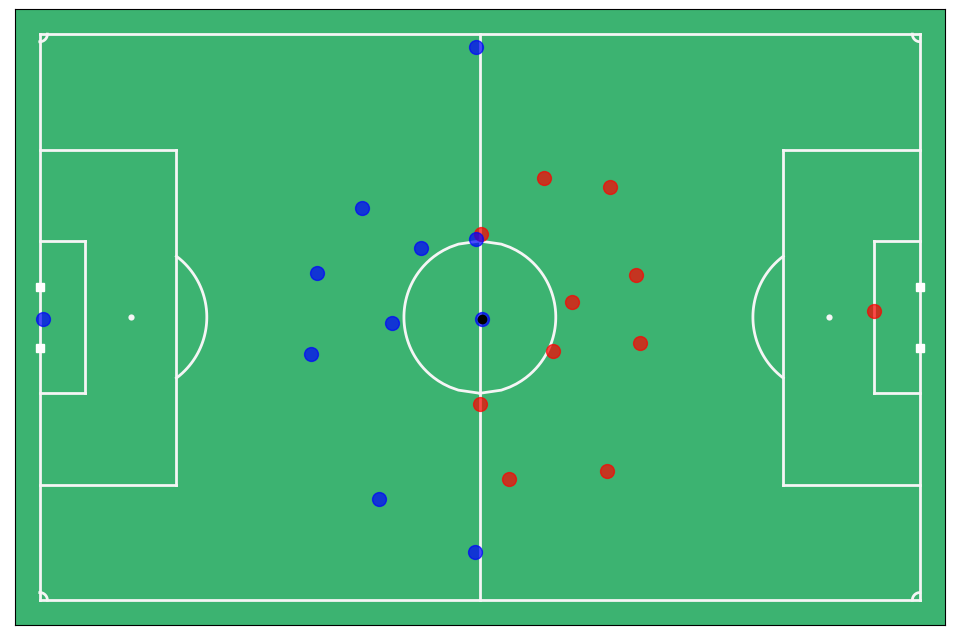

In [17]:
# # plot player positions at ,atckick-off
KO_Frame = events.loc[0]['Start Frame']
fig,ax = mviz.plot_frame( tracking_home.loc[KO_Frame], tracking_away.loc[KO_Frame] , )

### Factor #1. Openness

1. For openness, we look at the pressure of the opponent team (a), and it’s magnitude (b):
a.	Closest opponent player to the passer in meter (and similar for the receiver)
    - The distance can be quantify from a continuous scale from 0-1, where 1 means that opponent player is tackling (less than 1m of the player)
    -closest_opponent
    

2. For pressure magnitude: Count # of nearby players around passer and receiver with a radius of 10m
    - Pressure magnitude evolves similar to a logarithmic function as # of opponent plys increase


In [18]:
#Through ball
temp = tracking_home.merge(tracking_away, on = ['Period', 'Time [s]', 'Frame'], how ="left")

#nbr_ply_vector = pd.Series()  
nbr_ply_vector = []
  
distance_vector = []
#map tracking to event data
for i, row in passes.iterrows():
    #passer
    passer_name =''
    passer_nbr = row['From'].split('Player', 1)
    passer_name = row['Team'] + '_' + passer_nbr[1].replace(" ", "")
    
    #receiver
    receiver_name =''
    receiver_nbr = row['To'].split('Player', 1)
    receiver_name = row['Team'] + '_' + receiver_nbr[1].replace(" ", "")
    if row['Team'] == 'Away':
        opp_team = temp.loc[row["Start Frame"]].filter(like='Home')
        
        opp_team_end = temp.loc[row["End Frame"]].filter(like='Home')
        
    else:
        opp_team = temp.loc[row["Start Frame"]].filter(like='Away')
        
        opp_team_end = temp.loc[row["End Frame"]].filter(like='Away')
    
    i=0
    count_ply_near_r =0
    count_ply_near_p =0
    min_distance_1 = 106
    min_distance_2 = 106
    while i in range(int(len(opp_team)/2)):
        passer = temp.loc[row["Start Frame"]][[passer_name + '_x', passer_name + '_y']]
        distance_1 = np.linalg.norm(passer.values - opp_team[[i, i+1]].values)
        min_distance_1 = min(min_distance_1, distance_1) # take the closest opponent player
        
        if (distance_1 < 10) :
            count_ply_near_r +=1
        receiver = temp.loc[row["End Frame"]][[receiver_name + '_x', receiver_name + '_y']]
        distance_2 = np.linalg.norm(receiver.values - opp_team_end[[i, i+1]].values)
        min_distance_2 = min(min_distance_2, distance_2) # take the closest opponent player
        
        if (distance_2  < 10):
            count_ply_near_p +=1
            
        temp_vect = [min_distance_1, min_distance_2] 
        count_ply_nearby = [count_ply_near_p, count_ply_near_r] 
        i+=1
    
    distance_vector.append(temp_vect)
   
    nbr_ply_vector.append(count_ply_nearby)    

passes['nbr_nerby_ply'] = nbr_ply_vector
passes['closest_opponent'] = distance_vector

#compare end ball location to opponent players

# determine whether through ball

C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\4095006436.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['nbr_nerby_ply'] = nbr_ply_vector
C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\4095006436.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['closest_opponent'] = distance_vector


In [47]:
passes


,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,playmaker,lead_to_ball_lost,Possession_Outcome,nbr_nerby_ply,closest_opponent,Type_of_Pass,nbr_crossed_ply,x1_bin,y1_bin,x2_bin,y2_bin,xThreat_Pass
28,Home,PASS,Normal,1,1467,58.68,1489,59.56,Player1,Player11,46.64,21.08,53.00,10.20,False,False,0,"[0, 0]","[24.146668273772256, 28.89895448423697]",defensive,0,0,1,0,2,0.001379
36,Home,PASS,HEAD,1,1672,66.88,1693,67.72,Player6,Player7,19.08,14.96,19.08,8.84,False,True,0,"[2, 1]","[5.158233928662023, 4.753802913205381]",defensive,7,3,2,3,2,0.000000
52,Home,PASS,Normal,1,2414,96.56,2440,97.60,Player3,Player8,16.96,-24.48,1.06,-29.92,False,False,0,"[2, 0]","[15.240369010230694, 3.874641588173034]",neutral,3,4,6,6,7,0.002589
53,Home,PASS,Normal,1,2465,98.60,2493,99.72,Player8,Player4,2.12,-29.92,10.60,-31.96,False,False,0,"[1, 2]","[2.698206456148232, 4.275410147716814]",defensive,3,5,7,4,7,-0.001221
54,Home,PASS,Normal,1,2511,100.44,2546,101.84,Player4,Player3,11.66,-31.96,27.56,-25.16,False,False,0,"[0, 1]","[2.5343732328131976, 14.49361906462289]",defensive,2,4,7,2,6,-0.001839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,Home,PASS,Normal,2,120975,4839.00,120998,4839.92,Player13,Player12,13.78,2.04,26.50,-3.40,True,False,0.5,"[2, 0]","[12.279527152215593, 2.623327610497783]",progressive,0,7,4,9,3,0.015143
1752,Home,PASS,Normal,2,124106,4964.24,124177,4967.08,Player5,Player10,-10.60,17.68,18.02,27.20,False,False,0,"[3, 1]","[7.1683084019871774, 6.57627711070633]",progressive,0,4,5,8,7,0.008530
1753,Home,PASS,Normal,2,124311,4972.44,124336,4973.44,Player10,Player9,54.06,14.28,45.58,-0.00,False,False,0,"[4, 1]","[2.5325097336041993, 1.3883696337791338]",progressive,3,11,5,11,4,0.193028
1845,Home,PASS,GOAL KICK,2,133363,5334.52,133417,5336.68,Player11,Player7,-46.64,-5.44,5.30,-27.20,False,False,0.5,"[2, 0]","[21.940039005106623, 2.49302407120349]",progressive,3,0,3,6,0,0.005325


### Factor #2.Detect type of passes
#### Definition: all passes that are in the attacking 60% of the pitch and must travel 25% closer to the goal from the starting pass point
#### Progressive passes: in the attacking 60% of the pitch and must travel 25% closer to the goal from the starting pass point
#### 	Neutral passes: in the attacking 60% of the pitch and travel btw 0% to 25% closer to the goal from the starting pass point
#### 	Defensive passes: otherwise

#### # of outplayed players and xTreat could be a sub-parameter for the progressive passes to provide greater deept
#### 

In [19]:


beg_away = np.sqrt(np.square(53-passes['Start X']) + np.square(0 - passes['Start Y']))
end_away = np.sqrt(np.square(53 - passes['End X']) + np.square(0 - passes['End Y']))

beg_home = np.sqrt(np.square(-53-passes['Start X']) + np.square(0 - passes['Start Y']))
end_home = np.sqrt(np.square(-53 - passes['End X']) + np.square(0 - passes['End Y']))

condition = (
    # more than 25% closer to goal

    # within the attacking area
    (
     ((end_away / beg_away < .75) & (passes['End X']> -10.6) &  (passes['End X'] <=53) & (passes['Period'] == 1) & (passes['Team'] == 'Away' ))  |
    ( (end_home / beg_home < .75) & (passes['End X']< 10.6) &  (passes['End X'] >= -53) & (passes['Period'] == 2) & (passes['Team'] == 'Away' )) |
      ((end_home / beg_home < .75) & (passes['End X']< 10.6) &  (passes['End X'] >= -53) & (passes['Period'] == 1) & (passes['Team'] == 'Home' )) |
    ( (end_away / beg_away < .75) & (passes['End X']> -10.6) &  (passes['End X'] <=53) & (passes['Period'] == 2) & (passes['Team'] == 'Home' )) 
       
    )

)

passes['Type_of_Pass'] = np.where(condition , "progressive", "No type")

C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\1013916711.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passes['Type_of_Pass'] = np.where(condition , "progressive", "No type")


#### Now that we have the progressive passes, let's find the neutral and defensive passes

In [20]:
res = passes[passes['Type_of_Pass'] !="progressive"]


beg_away = np.sqrt(np.square(53-res['Start X']) + np.square(0 - res['Start Y']))
end_away = np.sqrt(np.square(53 - res['End X']) + np.square(0 - res['End Y']))

beg_home = np.sqrt(np.square(-53-res['Start X']) + np.square(0 - res['Start Y']))
end_home = np.sqrt(np.square(-53 - res['End X']) + np.square(0 - res['End Y']))

condition = (
    # more than 25% closer to goal

    # within the attacking area
    (
     ((end_away / beg_away > .75) & (end_away / beg_away < 1) & (res['End X']> -10.6) &  (res['End X'] <=53) & (res['Period'] == 1) & (res['Team'] == 'Away' ))  |
    ( (end_home / beg_home > .75) & (end_home / beg_home < 1) & (res['End X']< 10.6) &  (res['End X'] >= -53) & (res['Period'] == 2) & (res['Team'] == 'Away' )) |
      ((end_home / beg_home > .75) & (end_home / beg_home < 1) & (res['End X']< 10.6) &  (res['End X'] >= -53) & (res['Period'] == 1) & (res['Team'] == 'Home' )) |
    ( (end_away / beg_away > .75) & (end_away / beg_away < 1) & (res['End X']> -10.6) &  (res['End X'] <=53) & (res['Period'] == 2) & (res['Team'] == 'Home' )) 
       
    )

)

res['Type_of_Pass'] = np.where(condition , "neutral", 'defensive')
passes = res.append(passes[passes['Type_of_Pass'] == 'progressive'])

C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\2174781208.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res['Type_of_Pass'] = np.where(condition , "neutral", 'defensive')
C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\2174781208.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  passes = res.append(passes[passes['Type_of_Pass'] == 'progressive'])


In [21]:
passes['Type_of_Pass'].value_counts()

defensive      557
neutral        330
progressive     77
Name: Type_of_Pass, dtype: int64

In [22]:
passes

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,playmaker,lead_to_ball_lost,Possession_Outcome,nbr_nerby_ply,closest_opponent,Type_of_Pass
1,Away,PASS,Normal,1,51,2.04,87,3.48,Player23,Player20,0.00,-0.00,-10.60,-0.68,False,False,0.5,"[0, 1]","[9.255465941809737, 12.314918277179101]",defensive
2,Away,PASS,Normal,1,146,5.84,186,7.44,Player20,Player18,-7.42,-0.00,-6.36,19.04,False,False,0.5,"[2, 0]","[14.64771938652567, 4.432964130736905]",defensive
3,Away,PASS,Normal,1,248,9.92,283,11.32,Player18,Player17,-3.18,21.08,-20.14,14.96,False,False,0.5,"[0, 3]","[3.9182008544739, 18.231769105920577]",defensive
4,Away,PASS,Normal,1,316,12.64,346,13.84,Player17,Player16,-22.26,12.24,-25.44,-5.44,False,False,0.5,"[1, 0]","[15.662573371307792, 3.915911865657852]",defensive
5,Away,PASS,Normal,1,395,15.80,423,16.92,Player16,Player15,-25.44,-10.88,-24.38,-27.88,False,True,0.5,"[0, 1]","[8.021394854387855, 24.833346180851258]",defensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1779,Away,PASS,Normal,2,127118,5084.72,127179,5087.16,Player15,Player24,-18.02,31.96,-39.22,29.24,False,False,0,"[3, 2]","[0.3095339877945529, 3.0612931579317917]",progressive
1837,Away,PASS,Normal,2,130896,5235.84,130920,5236.80,Player20,Player23,-13.78,10.20,-26.50,-2.72,False,False,0.5,"[1, 1]","[4.242645869171738, 3.684077590768138]",progressive
1845,Home,PASS,GOAL KICK,2,133363,5334.52,133417,5336.68,Player11,Player7,-46.64,-5.44,5.30,-27.20,False,False,0.5,"[2, 0]","[21.940039005106623, 2.49302407120349]",progressive
1901,Away,PASS,CROSS,2,136020,5440.80,136060,5442.40,Player23,Player 26,-42.40,-22.44,-47.70,2.72,True,False,0,"[6, 0]","[13.112785129224068, 1.8514215935869367]",progressive


## Factor #2b .Detect the number of opponent player “outplayed” in the x-direction

In [23]:
home_ply = tracking_home.filter(like='Home').filter(like='_x').columns
away_passes = passes[passes['Team']=='Away'].reset_index(names = ['Pass_loc']).merge(tracking_home, left_on = 'Start Frame', right_on ='Frame', how ="left")



matrix_away = away_passes[['Pass_loc']].copy()
for player in home_ply:
    crossed_ply_condition = (away_passes[player].between(away_passes['Start X'],away_passes['End X']) |
                         away_passes[player].between(away_passes['End X'],away_passes['Start X']))

    matrix_away[player]= crossed_ply_condition

matrix_away['count'] = matrix_away[home_ply].sum(axis=1)



away_ply = tracking_away.filter(like='Away').filter(like='_x').columns

home_passes = passes[passes['Team']=='Home'].reset_index(names = ['Pass_loc']).merge(tracking_away, left_on = 'Start Frame', right_on ='Frame', how ="left")


matrix_home = home_passes[['Pass_loc']].copy()
for player in away_ply:
    crossed_ply_condition = (home_passes[player].between(home_passes['Start X'],home_passes['End X']) |
                         home_passes[player].between(home_passes['End X'],home_passes['Start X']))
    
    matrix_home[player]= crossed_ply_condition

matrix_home['count'] = matrix_home[away_ply].sum(axis=1)

master = matrix_home[['Pass_loc', 'count']].append(matrix_away[['Pass_loc', 'count']])

#merge results to passes dataframe
passes['nbr_crossed_ply'] = master.sort_values("Pass_loc")['count'].values


C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\4098343103.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master = matrix_home[['Pass_loc', 'count']].append(matrix_away[['Pass_loc', 'count']])


### Speed of passes


In [24]:
distance = np.sqrt(np.square(passes['End X']-passes['Start X']) + np.square(passes['End Y'] - passes['Start Y']))
time_elapse = passes['End Time [s]'] - passes['Start Time [s]']
speed = distance/time_elapse


(array([ 63., 457., 350.,  70.,  15.,   3.,   1.,   1.,   2.,   2.]),
 array([ 0.6054639 ,  6.29471314, 11.98396238, 17.67321162, 23.36246086,
        29.0517101 , 34.74095934, 40.43020859, 46.11945783, 51.80870707,
        57.49795631]),
 <BarContainer object of 10 artists>)

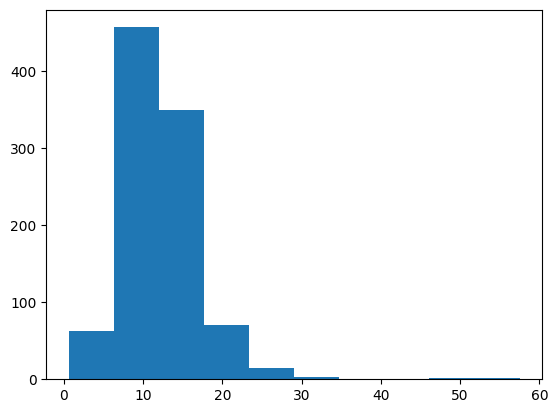

In [25]:
plt.hist(speed, 10)

Text(1.0, 1.0, 'F1: 0')

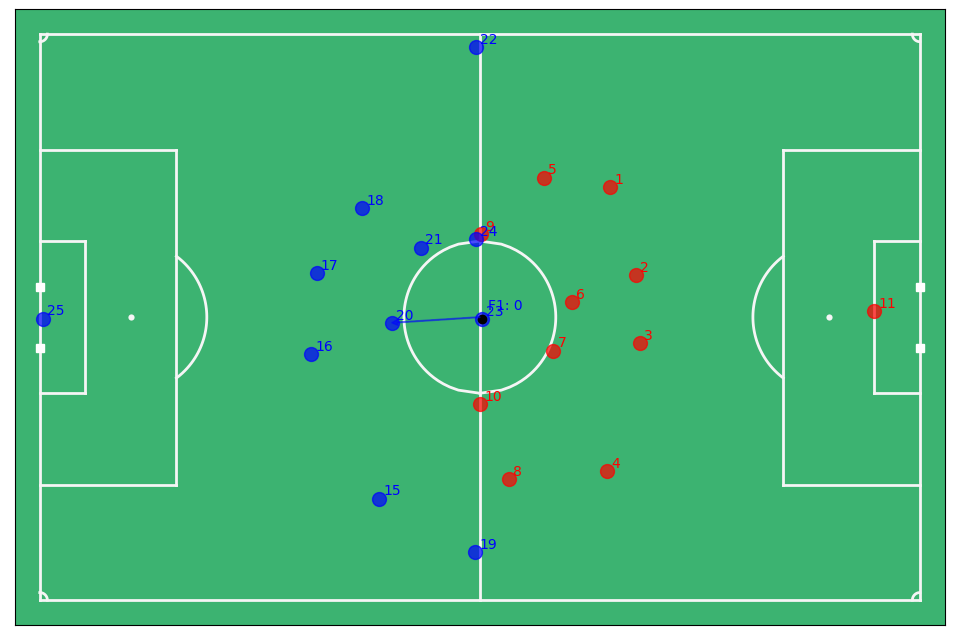

In [39]:
# We can also plot a single pass and all the positions of each team
pass_of_interest_loc = 1

pass_frame_number = passes.loc[pass_of_interest_loc]["Start Frame"]

fig, ax = mviz.plot_frame( tracking_home.loc[pass_frame_number], tracking_away.loc[pass_frame_number],annotate=True )
ax.annotate("", xy=passes.loc[pass_of_interest_loc][['End X', 'End Y']], xytext=passes.loc[pass_of_interest_loc][['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
textstring = 'F1: ' + str(passes.loc[pass_of_interest_loc]['nbr_crossed_ply'])
ax.text(passes.loc[pass_of_interest_loc]['Start X']+1, passes.loc[pass_of_interest_loc]['Start Y']+1,  textstring, fontsize=10, color='blue')



(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

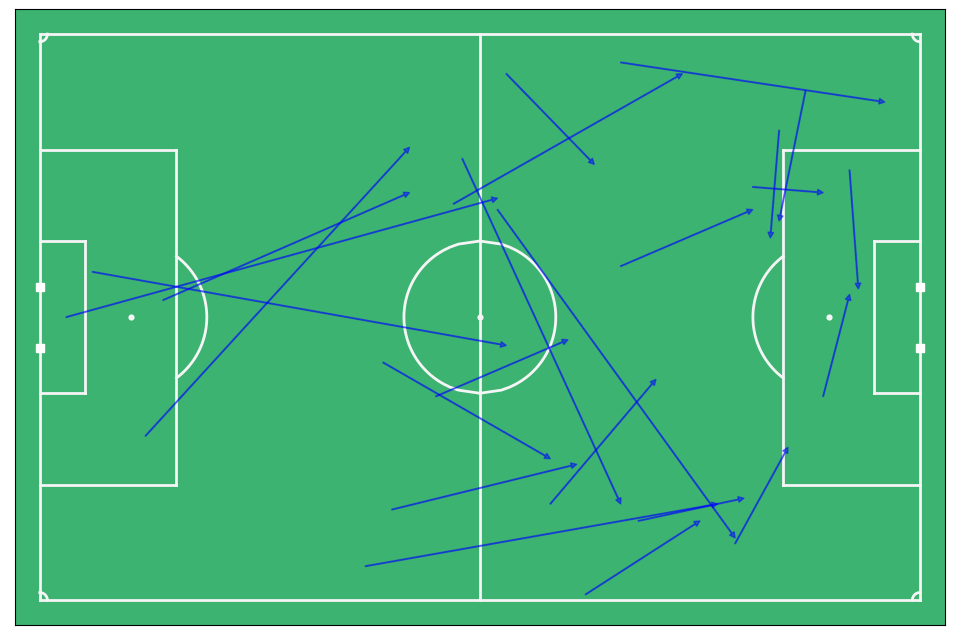

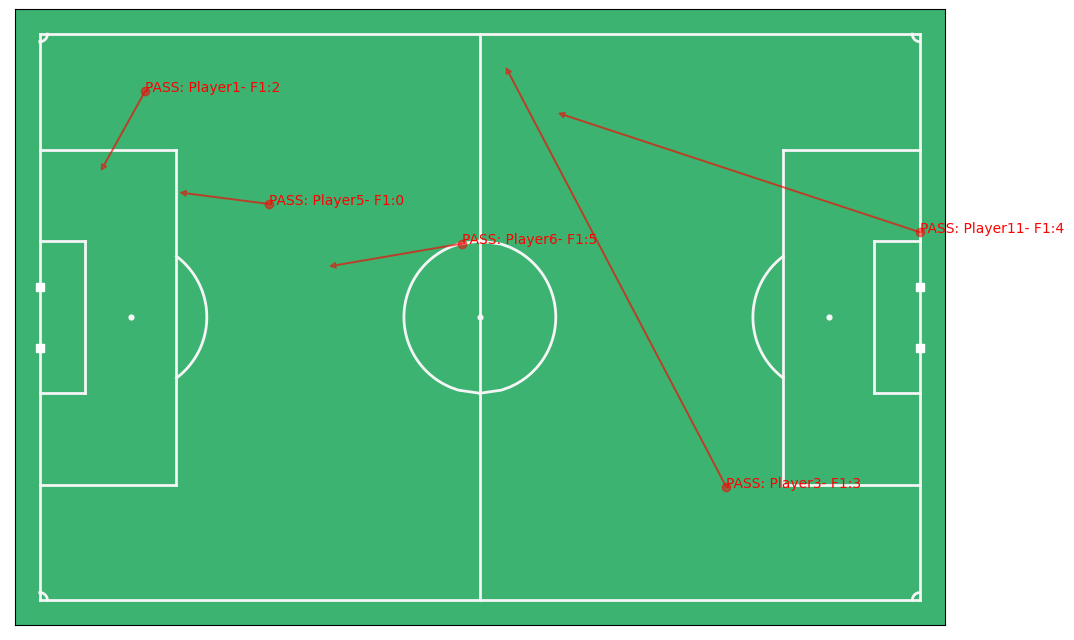

In [48]:
fig, ax= mviz.plot_pitch()


# Two ways to plot the first 4 passes:
for index, row in passes[passes["Type_of_Pass"]== 'progressive' ].iterrows():
       
    if ((row['Team'] == 'Away') & (row['Period'] == 1)):
        ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=True)
   # else:
    #    ax.annotate("", xy=row[['End X', 'End Y']], xytext=row[['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
     #             alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="red"), annotation_clip=False)
    
# That's essentially all that's in the plot_events function
mviz.plot_events( passes[passes["Type_of_Pass"]== 'progressive' ].iloc[:5], indicators = ['Marker','Arrow'], annotate=True)

### Factor #4. Expected Threat based on Origin and Destination zone

#### Origin and destination zone (difficulty of pass based on pitch area)
 - Pitch is divided into 18 zones will there respective weight (ie: based on xG score)
 - Quantify by: (weight in destination zone) - (weight in origin zone) =  score
 -	Positive score means ball moving closer to the goal
 
 Introducing Expected Threat (xT): https://karun.in/blog/expected-threat.html#visualizing-xt



In [28]:

import requests
#Import xT Grid, turn it into an array, and then get how many rows and columns it has

response = requests.get('https://karun.in/blog/data/open_xt_12x8_v1.json') #same data in the json file and csv file 
#xT = pd.read_csv(r"C:\Users\Michael\Documents\MACF courses material\Fall 2022\soccer_notebook_lab-master\xT\xT_Grid.csv", header=None)
xT = response.json()
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

<AxesSubplot: >

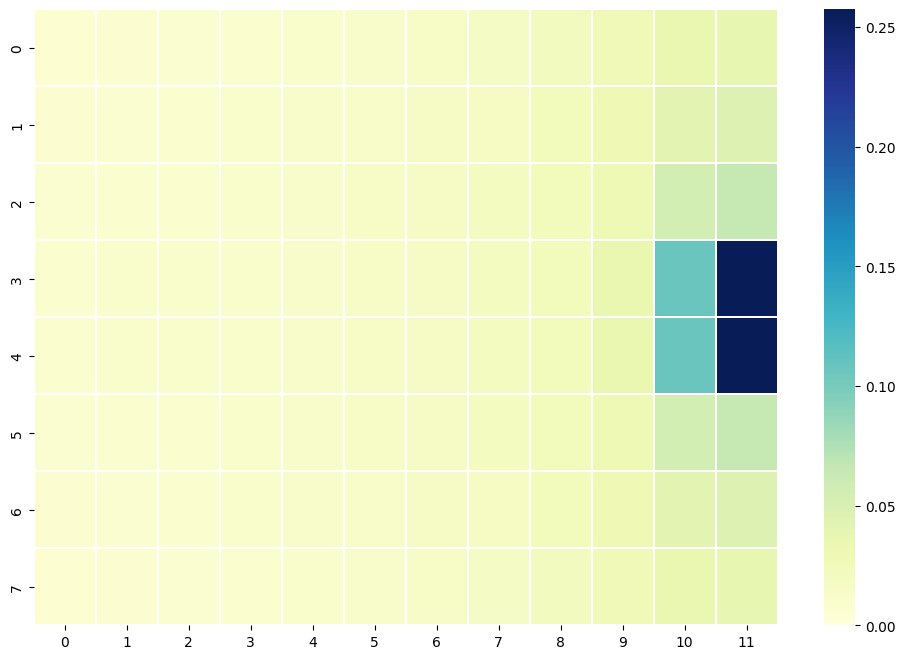

In [37]:
max = np.amax(xT)
fig ,ax = plt.subplots(figsize=(xT_cols, xT_rows))
ax.invert_yaxis()
sns.heatmap(xT , vmin=0, vmax=max, cmap="YlGnBu", linewidths=0.25, xticklabels=True,yticklabels=True)


In [42]:
import matplotsoccer as mps

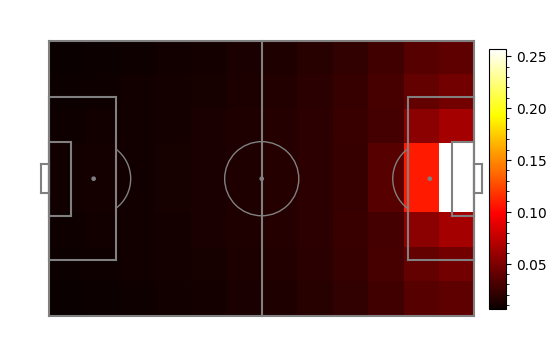

<AxesSubplot: >

In [50]:
mps.heatmap(xT, cmap="hot", linecolor="grey", cbar="True")


Text(-9.599999999999998, 18.68, 'F1: 0')

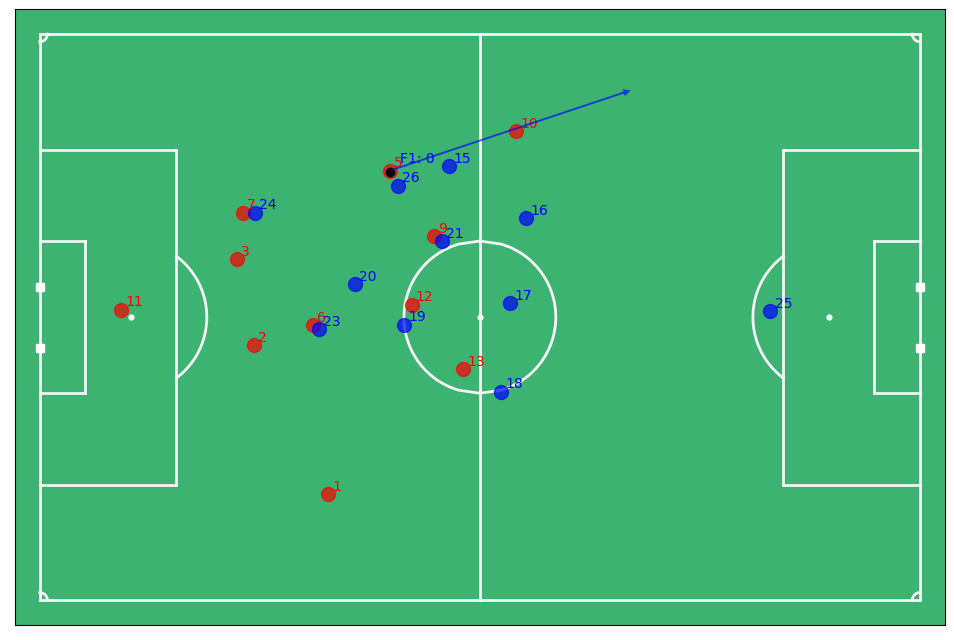

In [30]:
# We can also plot a single pass and all the positions of each team
pass_of_interest_loc = 1752

pass_frame_number = passes.loc[pass_of_interest_loc]["Start Frame"]

fig, ax = mviz.plot_frame( tracking_home.loc[pass_frame_number], tracking_away.loc[pass_frame_number],annotate=True )
ax.annotate("", xy=passes.loc[pass_of_interest_loc][['End X', 'End Y']], xytext=passes.loc[pass_of_interest_loc][['Start X', 'Start Y']], alpha=0.5, arrowprops=dict(
                    alpha=0.5, width=0.5, headlength=4.0, headwidth=4.0, color="blue"), annotation_clip=False)
textstring = 'F1: ' + str(passes.loc[pass_of_interest_loc]['nbr_crossed_ply'])
ax.text(passes.loc[pass_of_interest_loc]['Start X']+1, passes.loc[pass_of_interest_loc]['Start Y']+1,  textstring, fontsize=10, color='blue')

### Expected Threat

In [31]:
#Bin Data for xT
df =pd.DataFrame()
# We use a pandas method called .cut --> https://pandas.pydata.org/docs/reference/api/pandas.cut.html
# We say labels=False because we want the integer locator of the bin
condition_1 = passes[(passes['Team'] == 'Away') & (passes['Period'] ==1) | (passes['Team'] == 'Home') & (passes['Period'] ==2)]

condition_1['x1_bin'] = pd.cut(condition_1['Start X'], bins=xT_cols, labels=False)
condition_1['y1_bin'] = pd.cut(condition_1['Start Y'], bins=xT_rows, labels=False)
condition_1['x2_bin'] = pd.cut(condition_1['End X'], bins=xT_cols, labels=False)
condition_1['y2_bin'] = pd.cut(condition_1['End Y'], bins=xT_rows, labels=False)


condition_2 = passes[(passes['Team'] == 'Away') & (passes['Period'] ==2) | (passes['Team'] == 'Home') & (passes['Period'] ==1)]

condition_2['x1_bin'] = pd.cut(-condition_2['Start X'], bins=xT_cols, labels=False)
condition_2['y1_bin'] = pd.cut(-condition_2['Start Y'], bins=xT_rows, labels=False)
condition_2['x2_bin'] = pd.cut(-condition_2['End X'], bins=xT_cols, labels=False)
condition_2['y2_bin'] = pd.cut(-condition_2['End Y'], bins=xT_rows, labels=False)

passes = condition_2.append(condition_1)

# reaganged format variable from [(X,Y), (X,Y), (X,Y)]to  [(X,X,X), (Y,Y,Y)]
passes['xThreat_Pass'] = xT[tuple(zip(*passes[['y2_bin', 'x2_bin']].values))] - xT[tuple(zip(*passes[['y1_bin', 'x1_bin']].values))] 

C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\2534457680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition_1['x1_bin'] = pd.cut(condition_1['Start X'], bins=xT_cols, labels=False)
C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\2534457680.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  condition_1['y1_bin'] = pd.cut(condition_1['Start Y'], bins=xT_rows, labels=False)
C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\2534457680.py:9: SettingWithCopyWarning: 
A value is trying to be s

C:\Users\Michael\AppData\Local\Temp\ipykernel_2644\2008840934.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.hist(passes['xThreat_Pass'][:-1], 20, weights=None)


(array([  1.,   1.,   0.,   1., 104., 816.,  20.,   6.,   1.,   0.,   2.,
          0.,   0.,   0.,   0.,   0.,   0.,   2.,   4.,   5.]),
 array([-0.079499  , -0.06412801, -0.04875701, -0.03338602, -0.01801502,
        -0.00264403,  0.01272697,  0.02809796,  0.04346896,  0.05883995,
         0.07421095,  0.08958194,  0.10495294,  0.12032393,  0.13569493,
         0.15106592,  0.16643692,  0.18180791,  0.19717891,  0.2125499 ,
         0.2279209 ]),
 <BarContainer object of 20 artists>)

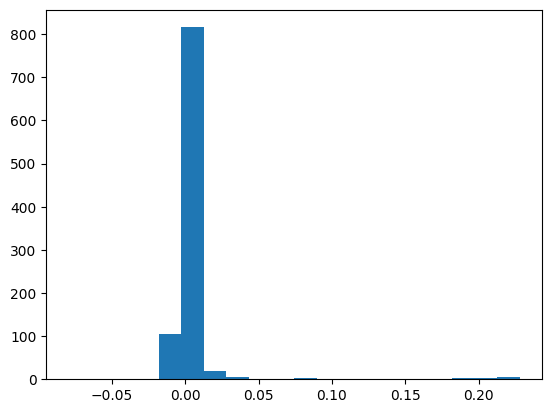

In [32]:
plt.hist(passes['xThreat_Pass'][:-1], 20, weights=None)

In [33]:
passes[(passes['xThreat_Pass']<0.01) & (passes['Type_of_Pass'] != 'progressive')].head()
#passes[(passes['progressive'] != 'False')].count()

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,playmaker,lead_to_ball_lost,Possession_Outcome,nbr_nerby_ply,closest_opponent,Type_of_Pass,nbr_crossed_ply,x1_bin,y1_bin,x2_bin,y2_bin,xThreat_Pass
28,Home,PASS,Normal,1,1467,58.68,1489,59.56,Player1,Player11,46.64,21.08,53.00,10.20,False,False,0,"[0, 0]","[24.146668273772256, 28.89895448423697]",defensive,0,0,1,0,2,0.001379
36,Home,PASS,HEAD,1,1672,66.88,1693,67.72,Player6,Player7,19.08,14.96,19.08,8.84,False,True,0,"[2, 1]","[5.158233928662023, 4.753802913205381]",defensive,7,3,2,3,2,0.000000
52,Home,PASS,Normal,1,2414,96.56,2440,97.60,Player3,Player8,16.96,-24.48,1.06,-29.92,False,False,0,"[2, 0]","[15.240369010230694, 3.874641588173034]",neutral,3,4,6,6,7,0.002589
53,Home,PASS,Normal,1,2465,98.60,2493,99.72,Player8,Player4,2.12,-29.92,10.60,-31.96,False,False,0,"[1, 2]","[2.698206456148232, 4.275410147716814]",defensive,3,5,7,4,7,-0.001221
54,Home,PASS,Normal,1,2511,100.44,2546,101.84,Player4,Player3,11.66,-31.96,27.56,-25.16,False,False,0,"[0, 1]","[2.5343732328131976, 14.49361906462289]",defensive,2,4,7,2,6,-0.001839


In [34]:
passes

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y,playmaker,lead_to_ball_lost,Possession_Outcome,nbr_nerby_ply,closest_opponent,Type_of_Pass,nbr_crossed_ply,x1_bin,y1_bin,x2_bin,y2_bin,xThreat_Pass
28,Home,PASS,Normal,1,1467,58.68,1489,59.56,Player1,Player11,46.64,21.08,53.00,10.20,False,False,0,"[0, 0]","[24.146668273772256, 28.89895448423697]",defensive,0,0,1,0,2,0.001379
36,Home,PASS,HEAD,1,1672,66.88,1693,67.72,Player6,Player7,19.08,14.96,19.08,8.84,False,True,0,"[2, 1]","[5.158233928662023, 4.753802913205381]",defensive,7,3,2,3,2,0.000000
52,Home,PASS,Normal,1,2414,96.56,2440,97.60,Player3,Player8,16.96,-24.48,1.06,-29.92,False,False,0,"[2, 0]","[15.240369010230694, 3.874641588173034]",neutral,3,4,6,6,7,0.002589
53,Home,PASS,Normal,1,2465,98.60,2493,99.72,Player8,Player4,2.12,-29.92,10.60,-31.96,False,False,0,"[1, 2]","[2.698206456148232, 4.275410147716814]",defensive,3,5,7,4,7,-0.001221
54,Home,PASS,Normal,1,2511,100.44,2546,101.84,Player4,Player3,11.66,-31.96,27.56,-25.16,False,False,0,"[0, 1]","[2.5343732328131976, 14.49361906462289]",defensive,2,4,7,2,6,-0.001839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722,Home,PASS,Normal,2,120975,4839.00,120998,4839.92,Player13,Player12,13.78,2.04,26.50,-3.40,True,False,0.5,"[2, 0]","[12.279527152215593, 2.623327610497783]",progressive,0,7,4,9,3,0.015143
1752,Home,PASS,Normal,2,124106,4964.24,124177,4967.08,Player5,Player10,-10.60,17.68,18.02,27.20,False,False,0,"[3, 1]","[7.1683084019871774, 6.57627711070633]",progressive,0,4,5,8,7,0.008530
1753,Home,PASS,Normal,2,124311,4972.44,124336,4973.44,Player10,Player9,54.06,14.28,45.58,-0.00,False,False,0,"[4, 1]","[2.5325097336041993, 1.3883696337791338]",progressive,3,11,5,11,4,0.193028
1845,Home,PASS,GOAL KICK,2,133363,5334.52,133417,5336.68,Player11,Player7,-46.64,-5.44,5.30,-27.20,False,False,0.5,"[2, 0]","[21.940039005106623, 2.49302407120349]",progressive,3,0,3,6,0,0.005325


(<Figure size 1200x800 with 1 Axes>, <AxesSubplot: >)

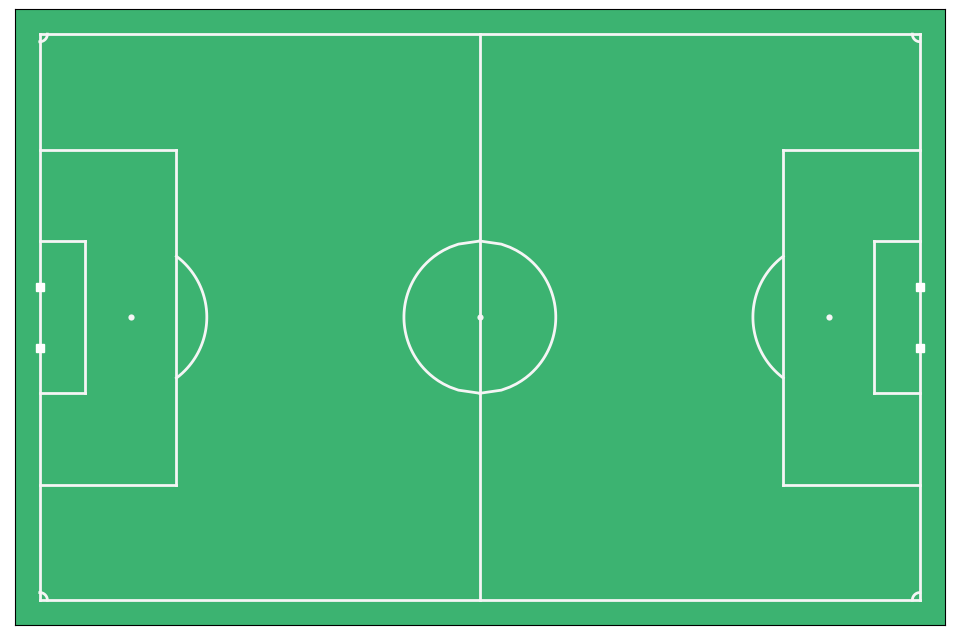

In [35]:
fig = mviz.plot_pitch()
fig.hea